## Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

## Read the data 

In [2]:
Data = pd.read_csv('creditcard.csv')
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
Data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Drop the variable we do not need

In [5]:
#Drop Time
dataset = Data.drop(['Time'],axis=1)
#dataset =data

In [6]:
dataset.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

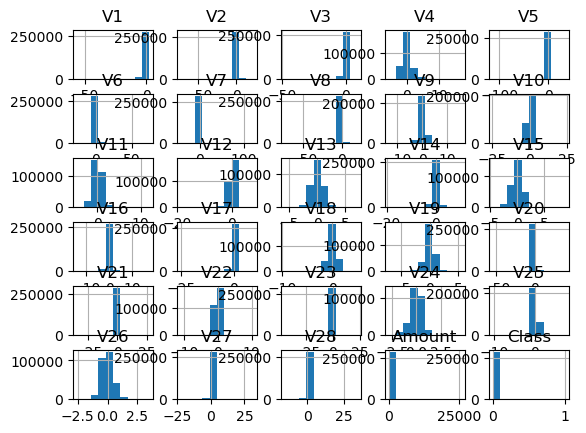

In [7]:
dataset.hist()

## Plot Correlation chart

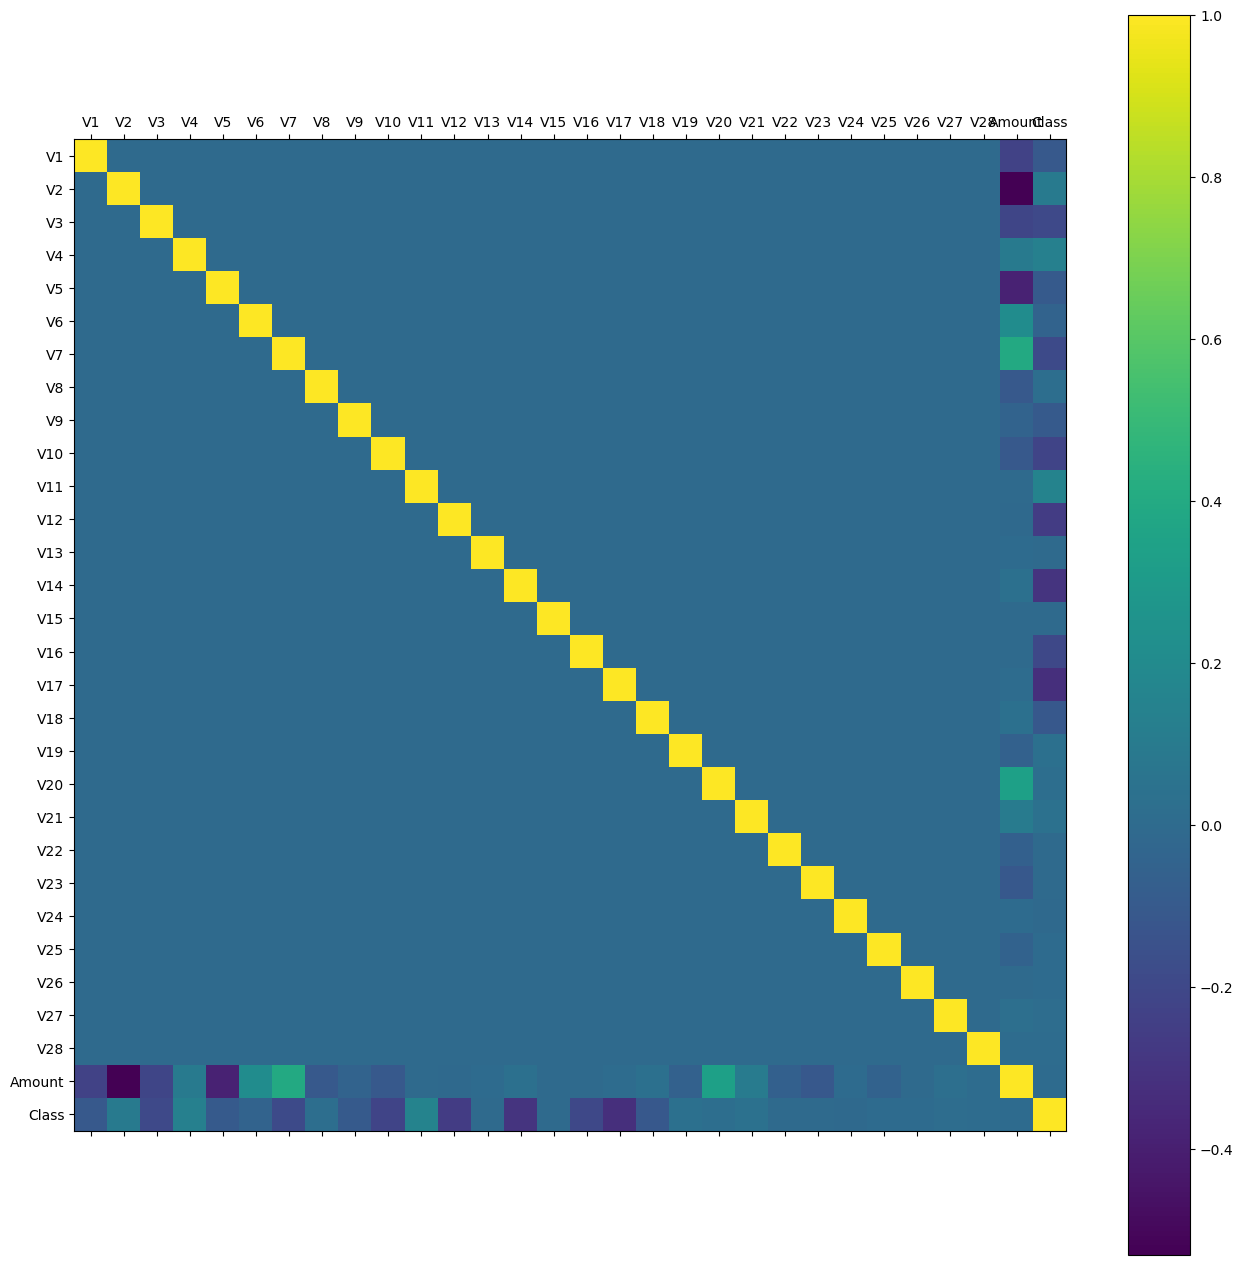

In [8]:
rcParams['figure.figsize'] = 20,20  #10 15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

## Know the classes or levels of the variable (Transaction)

In [9]:
dataset['Class'].unique()

array([0, 1], dtype=int64)

## Get the count of the classes or levels

Text(0.5, 1.0, 'Count of each Target Class')

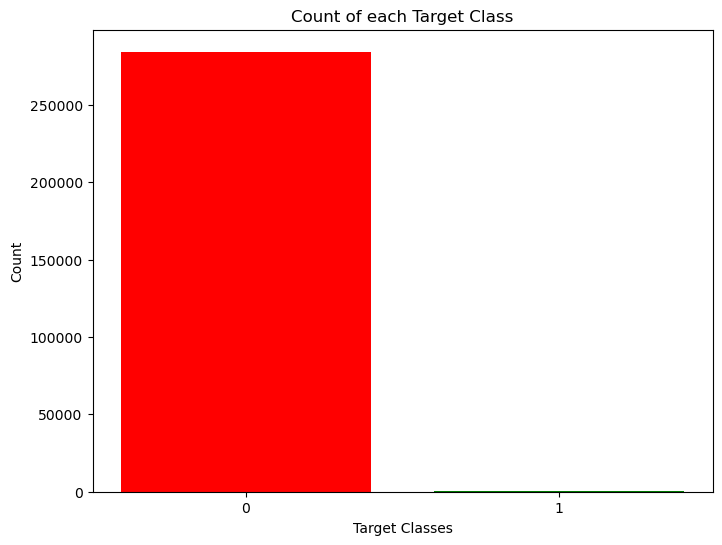

In [10]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Class'].unique(), dataset['Class'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### Split the Data to X and Y and Train and testing

In [ ]:
#Define the data set as X and Y
y = dataset['Class']
X = dataset.drop(['Class'], axis = 1)

#Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Train One tree

In [14]:
#Define the Grid search parameters
Hyper_paramters={'criterion':['entropy'],'max_depth':[4]}

#Define the five fold Cross Validation
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)


#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  #gets best estimator
Final_Model=Tree_crossvalidation.best_estimator_ #gets best estimator
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances
#Tree_crossvalidation.cv_results_  #gets summary of results
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 4}
The best AUC score was 
0.9415856941911513
('V1', array([0.]))
('V2', array([0.]))
('V3', array([0.]))
('V4', array([0.02073626]))
('V5', array([0.]))
('V6', array([0.]))
('V7', array([0.]))
('V8', array([0.]))
('V9', array([0.]))
('V10', array([0.05680758]))
('V11', array([0.]))
('V12', array([0.]))
('V13', array([0.]))
('V14', array([0.14411129]))
('V15', array([0.]))
('V16', array([0.00747344]))
('V17', array([0.75232589]))
('V18', array([0.]))
('V19', array([0.]))
('V20', array([0.01072125]))
('V21', array([0.00364485]))
('V22', array([0.]))
('V23', array([0.00417945]))
('V24', array([0.]))
('V25', array([0.]))
('V26', array([0.]))
('V27', array([0.]))
('V28', array([0.]))
('Amount', array([0.]))


## Train the Bagging Model

In [19]:
#Define the Grid search parameters
Hyper_paramters={'n_estimators':[3,4,5,6] }

#Define the five fold Cross Validation
Tree_Gridsearch_paramters=GridSearchCV(BaggingClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)


#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  #gets best estimator
Final_Model=Tree_crossvalidation.best_estimator_ #gets best estimator
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances
#Tree_crossvalidation.cv_results_  #gets summary of results
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best paramter combination is 
{'n_estimators': 6}
The best AUC score was 
0.921732623076382


AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

### Train the Random Forst Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Define the Grid search parameters
Hyper_paramters={'criterion':['entropy'],'max_depth':[4,10],'n_estimators':[50, 100], 'max_features':['sqrt'] }

#Define the five fold Cross Validation max_features
Tree_Gridsearch_paramters=GridSearchCV(RandomForestClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)


#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  #gets best estimator
Final_Model=Tree_crossvalidation.best_estimator_ #gets best estimator
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances
#Tree_crossvalidation.cv_results_  #gets summary of results
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
The best AUC score was 
0.9814190255132889
('V1', array([0.00740527]))
('V2', array([0.01301649]))
('V3', array([0.01997268]))
('V4', array([0.03470727]))
('V5', array([0.00999465]))
('V6', array([0.00972079]))
('V7', array([0.03862627]))
('V8', array([0.00710676]))
('V9', array([0.02373789]))
('V10', array([0.12075412]))
('V11', array([0.05675213]))
('V12', array([0.10778389]))
('V13', array([0.00535506]))
('V14', array([0.21185509]))
('V15', array([0.0062786]))
('V16', array([0.05225505]))
('V17', array([0.15847036]))
('V18', array([0.02456981]))
('V19', array([0.01090878]))
('V20', array([0.00941662]))
('V21', array([0.0169919]))
('V22', array([0.0051383]))
('V23', array([0.00436598]))
('V24', array([0.00502264]))
('V25', array([0.00491585]))
('V26', array([0.01041337]))
('V27', array([0.00762051]))
('V28

# Predict using the best model (The last model trained)

In [28]:
#Prediction Using the Model
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Safe", "Fraud"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

# Accuracy :  0.9993504441557529
# Sensitivity :  0.9998241325337226
# Specificity :  0.7326732673267327
#https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

[[56855     6]
 [   22    79]]
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00     56861
       Fraud       0.93      0.78      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy :  0.9995084442259752
Sensitivity :  0.9998944795202336
Specificity :  0.7821782178217822


## Plot a confusion Matrix

In [29]:
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    #plt.ylabel('True label', fontsize=35)
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:100.4f}'.format(accuracy, misclass), fontsize=35)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:100.4f}'.format(accuracy, misclass))
    plt.show()
    
    
# Modify the default matplotlib parameters for the desired fontsize
plt.rcParams.update({'font.size': 30})

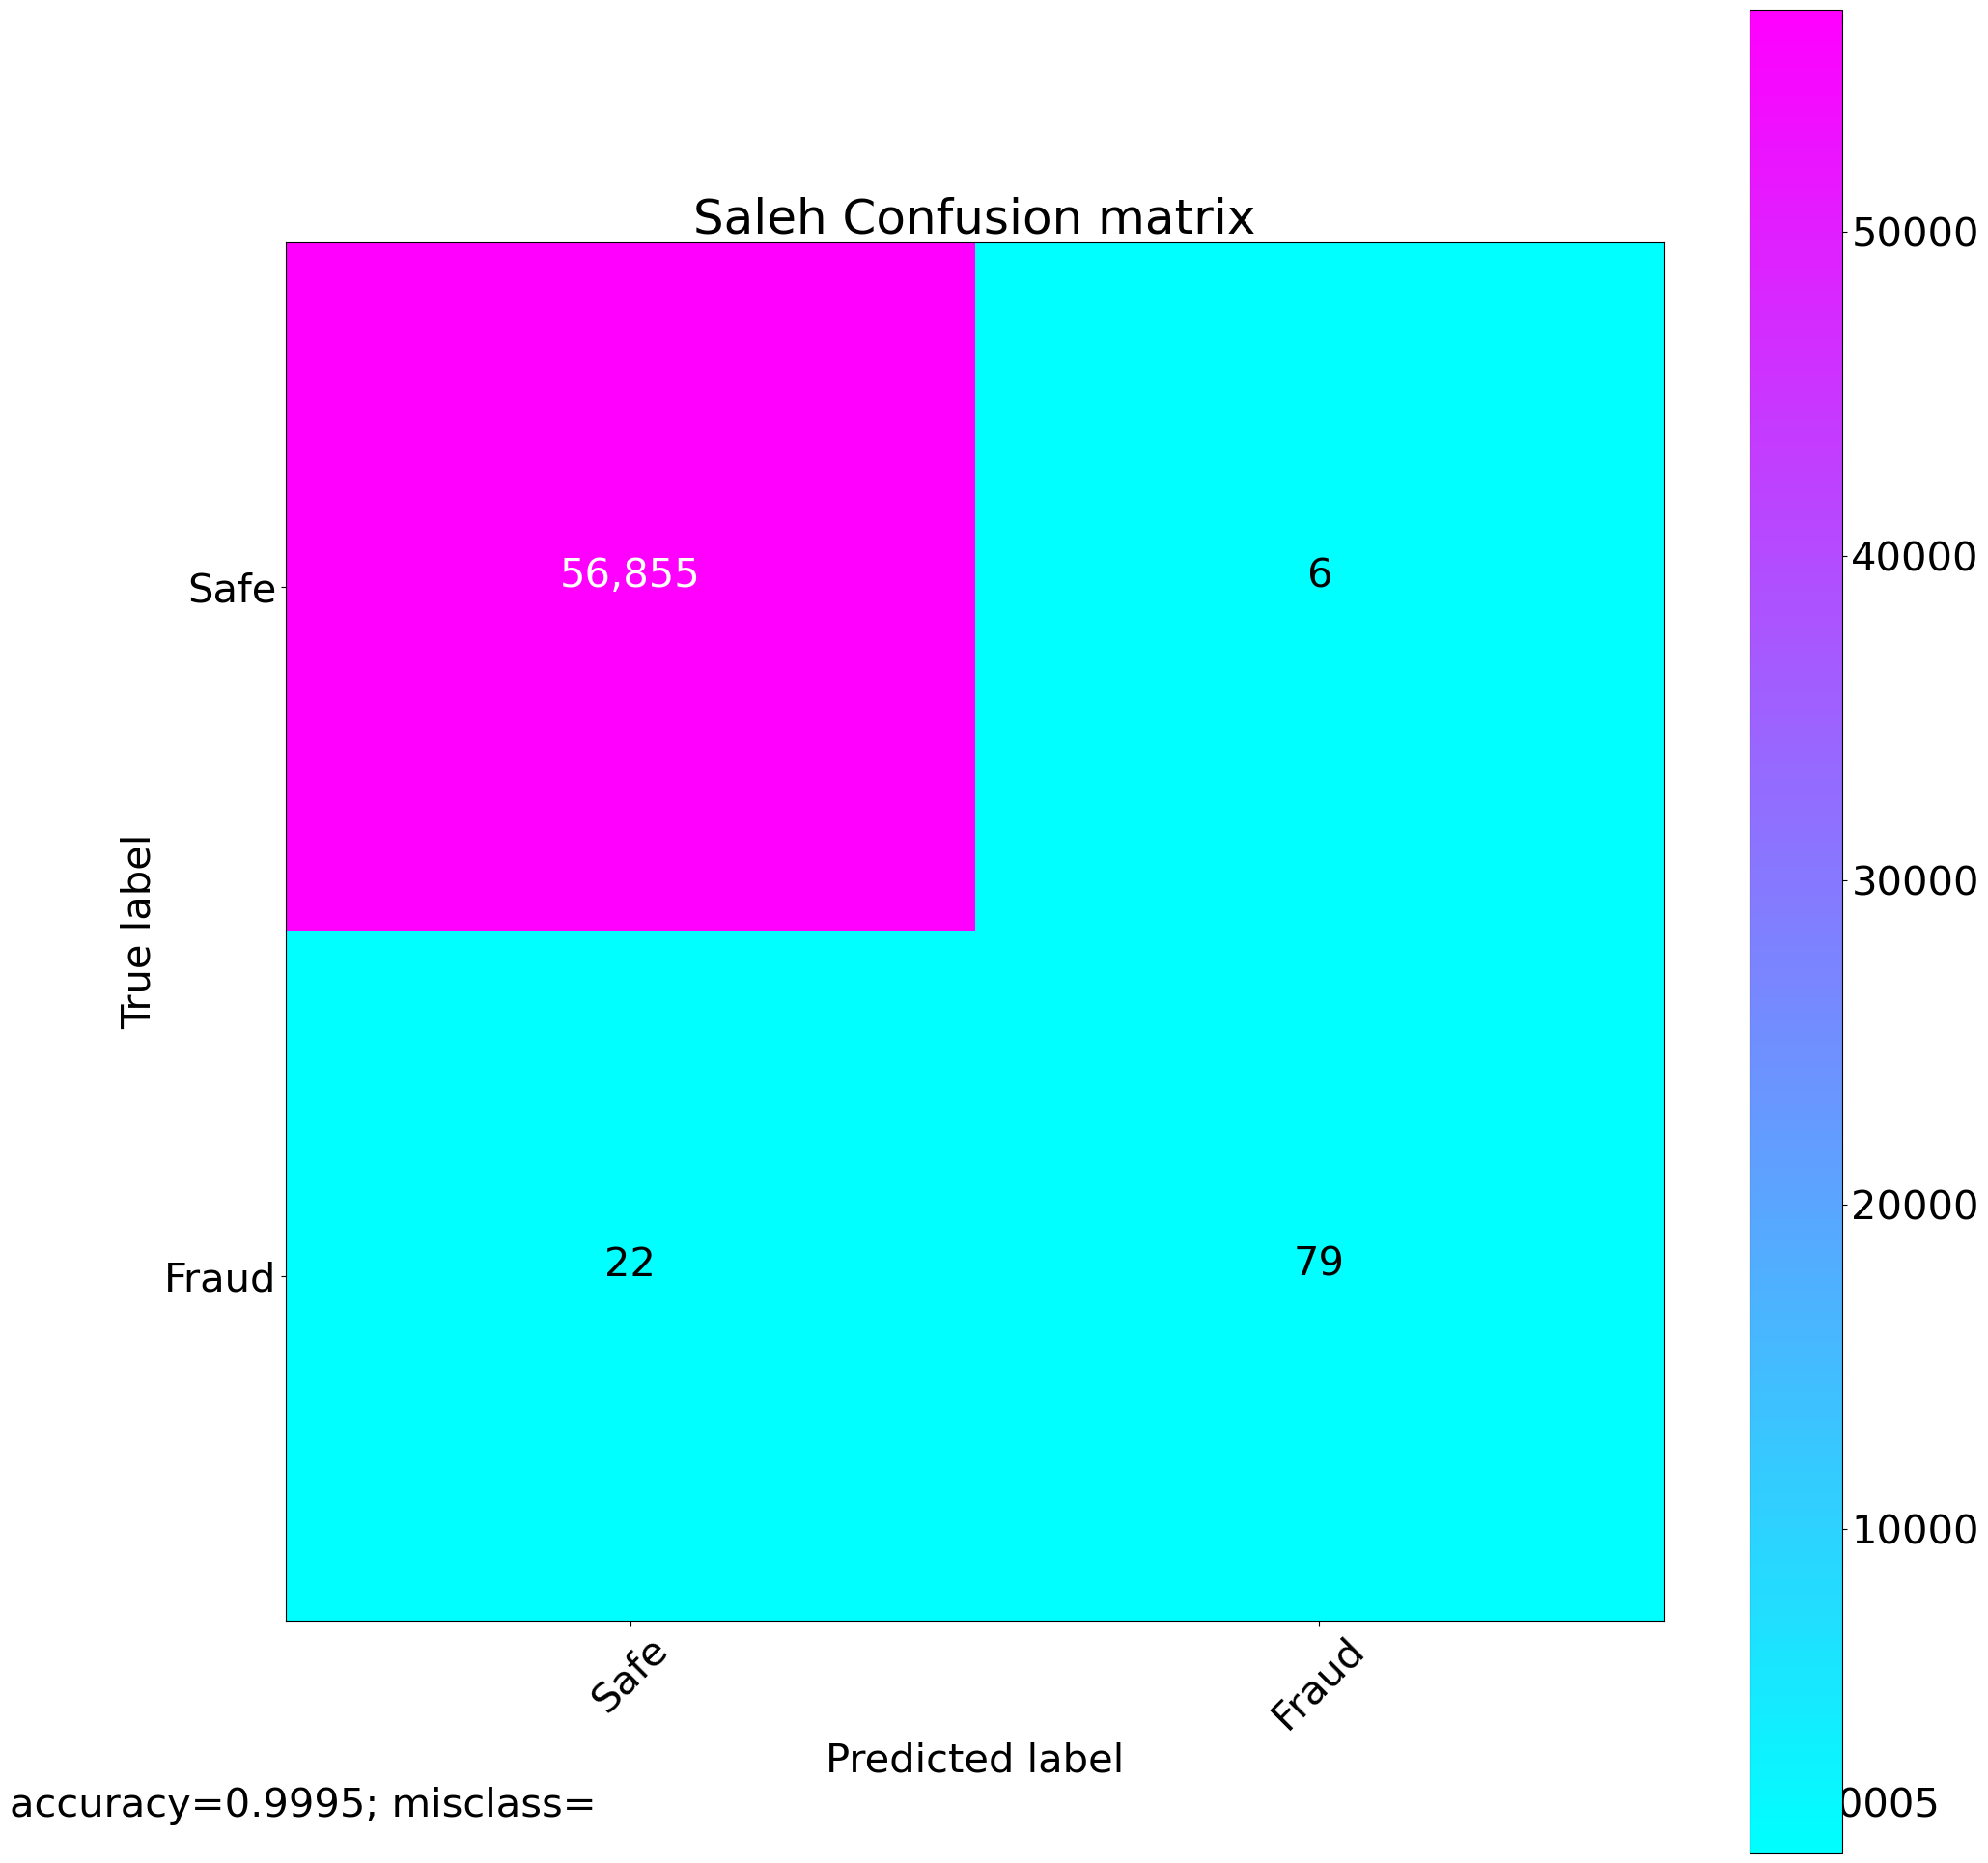

In [30]:
plot_confusion_matrix(cm1,
                          ["Safe","Fraud"], # use y_train.unique()  to know order of labels
                          title='Saleh Confusion matrix',
                          cmap=None,
                          normalize=False)

#error= 27,10
#accuraate= 74

# Plot ROC Curve

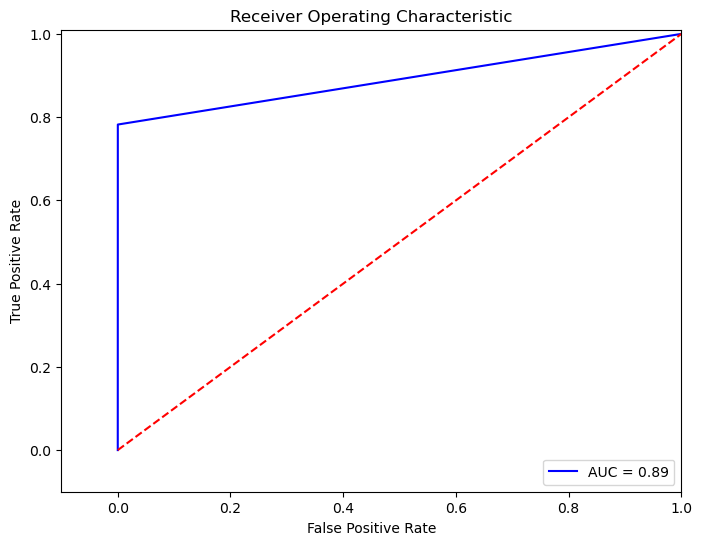

In [31]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

plt.rcParams.update({'font.size': 10})

fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()
